# Họ tên: Nguyễn Phú Thành, MSSV:  18110014
# Bài tập Phân tích và xử lý ảnh 01

In [1]:
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
import numpy as np
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage import exposure, feature

In [2]:
def imShows(Images, Labels = None, rows = 1, cols = 1):
    imagesArray = list(Images)
    labelsArray = [f"Image {i + 1}" for i in range(len(imagesArray))] if Labels is None else list(Labels)
    figsize = (20, 20) if ((rows == 1) and (cols == 1)) else (cols * 8, rows * 5)
    fig = plt.figure(figsize = figsize)
    for i in range(1, rows * cols + 1):
        ax = fig.add_subplot(rows, cols, i)
        image = imagesArray[i - 1]
        cmap = plt.cm.gray if (len(image.shape) < 3) else None
        ax.imshow(image, cmap = cmap)
        ax.set(title = labelsArray[i - 1], xticks = [], yticks = [])
    plt.show()

def showThreeImages(IM1, IM2, IM3):
    imShows([IM1, IM2, IM3], rows = 1, cols = 3)

def showTwoImages(IM1, IM2):
    imShows([IM1, IM2], rows = 1, cols = 2)

def showOneImage(IM1):
    imShows([IM1])

def showListImages(listImage, rows, cols):
    imShows(listImage, rows = rows, cols = cols)

# Bài tập 1

In [3]:
image_color = imread('fruit.jpg')

# * Tạo ảnh grayscale

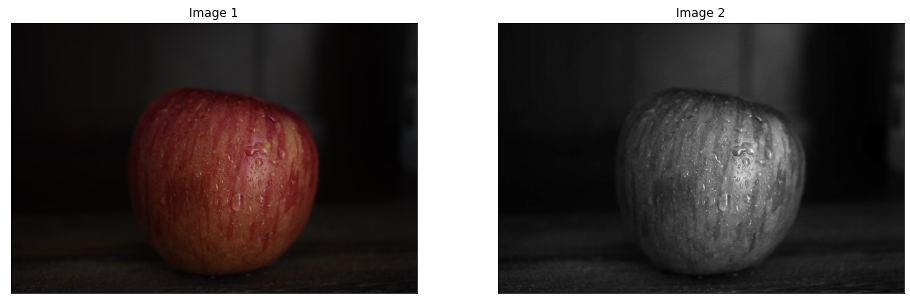

In [4]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
showTwoImages(image_color, image_gray)

# * Tạo ảnh hsv và hiển thị các kênh hue, saturation và value

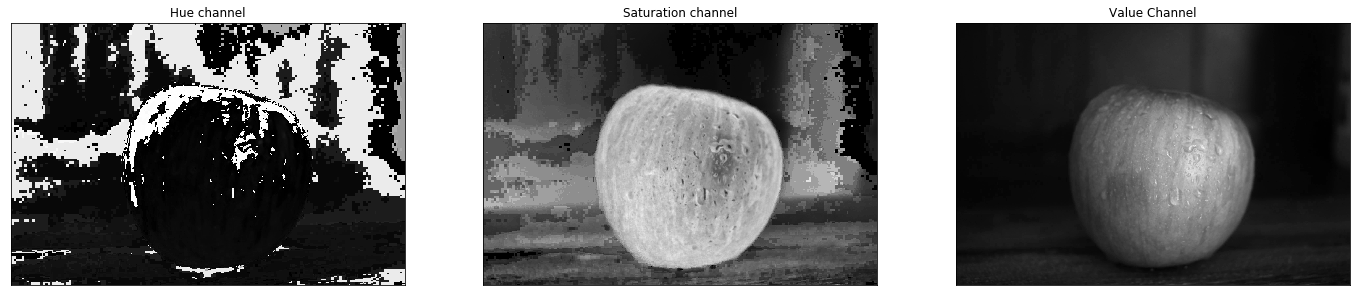

In [5]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
imShows(Images = [image_hsv[:,:,i] for i in range(3)], 
        Labels = [f"{s}" for s in ("Hue channel", "Saturation channel","Value Channel")], 
        rows = 1, cols = 3
       )

# * Chọn ngưỡng hue để trích xuất đối tượng chủ đạo trong ảnh (hiển thị ảnh màu đối tượng sau khi trích xuất)

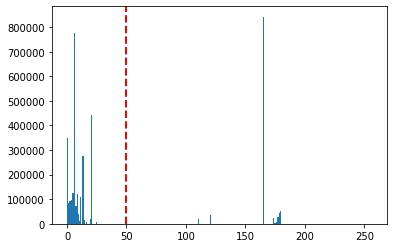

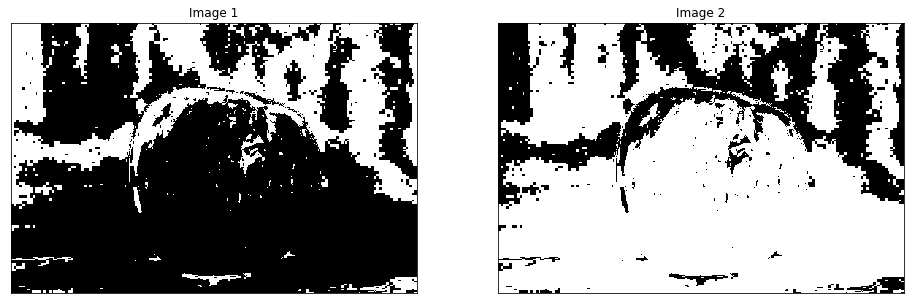

In [6]:
hue_img = image_hsv[:, :, 0]
hue_threshold = 50
fig, ax = plt.subplots()
ax.hist(hue_img.ravel(), bins = 256, range = [0, 256])
ax.axvline(x = hue_threshold, color = 'r', linestyle = 'dashed', linewidth = 2)
plt.show()

hue_binary_01 = hue_img > hue_threshold
hue_binary_02 = hue_img < hue_threshold
showTwoImages(hue_binary_01, hue_binary_02)

In [7]:
def segmentByColorMask(im, mask):
    mask = mask.astype(np.uint8)
    result = cv2.bitwise_and(im, im, mask = mask)
    return result

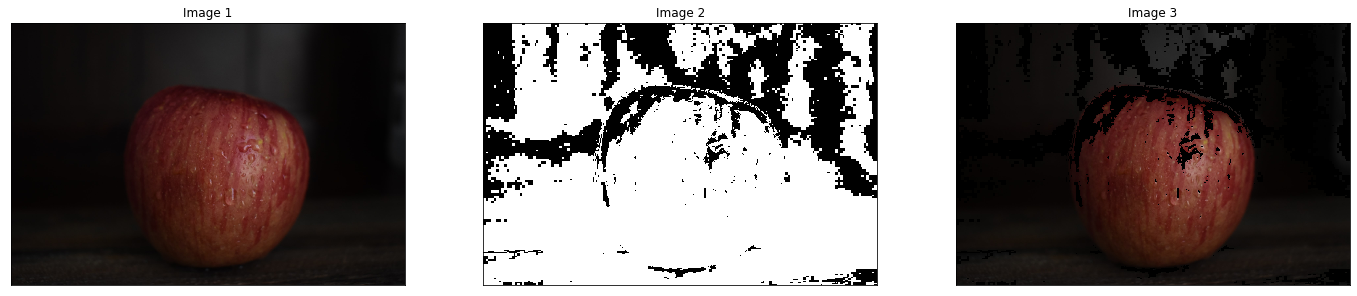

In [8]:
showThreeImages(image_color, hue_binary_02, segmentByColorMask(image_color, hue_binary_02))

# * Hiển thị histogram của 3 kênh màu r,g,b

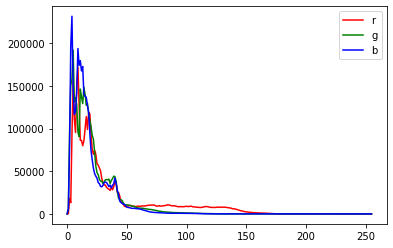

In [9]:
colors = ('r', 'g', 'b')
fig, ax = plt.subplots()
for (channel, color) in enumerate(colors):
    histr = cv2.calcHist([image_color], [channel], None, [256], [0, 256])
    ax.plot(histr, color = color, label = f'{color}')
plt.legend()
plt.show()

# * Hiển thị histogram của 3 kênh màu h,s,v

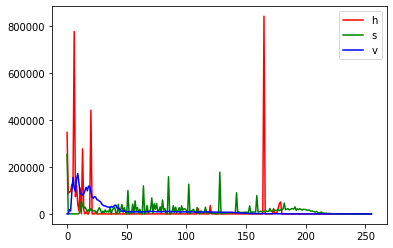

In [10]:
colors = ('r', 'g', 'b')
labels = ('h', 's', 'v')
fig, ax = plt.subplots()
for (channel, color) in enumerate(colors):
    histr = cv2.calcHist([image_hsv], [channel], None, [256], [0, 256])
    ax.plot(histr, color = color, label = f'{labels[channel]}')
plt.legend()
plt.show()

# Bài tập 2

# * Tạo ảnh xám từ ảnh màu

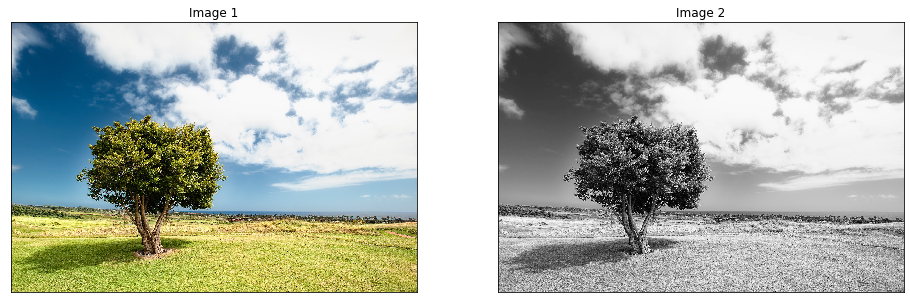

In [11]:
image_color = imread('landscape.jpg')
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)
showTwoImages(image_color, image_gray)

# * Làm mờ ảnh

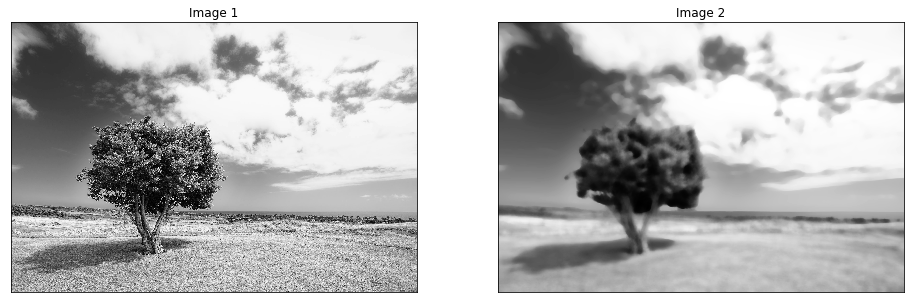

In [12]:
image_blurred = median(image_gray, disk(20))
showTwoImages(image_gray, image_blurred)

# * Làm nhiễu ảnh

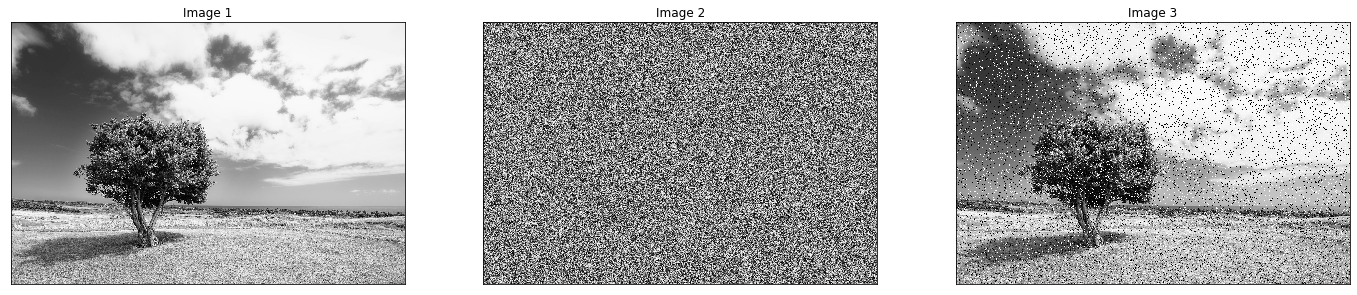

In [13]:
noise = np.random.uniform(size = image_gray.shape)
image_noise = image_gray.copy()
image_noise[noise > 0.95] = 255
image_noise[noise < 0.05] = 0
showThreeImages(image_gray, noise, image_noise)

# * Hiển thị histogram của ảnh xám và cân bằng histogram, hiển thị ảnh sau khi cân bằng

In [14]:
def my_HistEqualization(gray_img, L = 256):
    M, N = gray_img.shape
    return_img = gray_img.copy()
    hist = np.histogram(gray_img.ravel(), bins = L, range = [0, L])[0]
    hist = hist.cumsum()
    for i in range(L):
        return_img[gray_img == i] = (hist[i])*(L - 1)/(M * N)
    return return_img

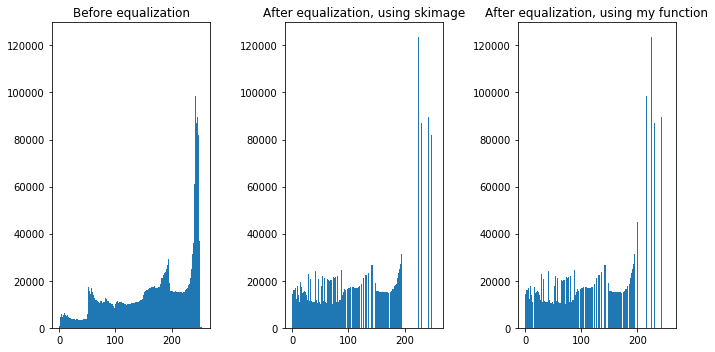

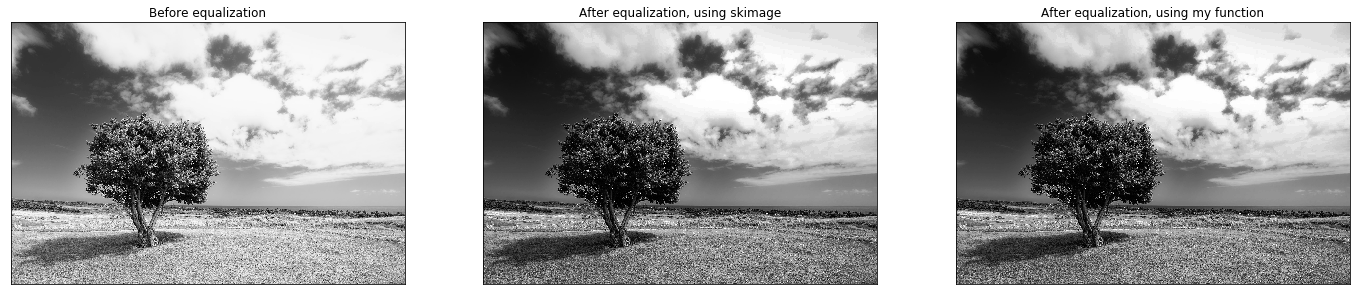

In [15]:
image_equalization = exposure.equalize_hist(image_gray)
image_equalization = np.float32(image_equalization * 255)
image_my_equalization = my_HistEqualization(image_gray)

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 5))
axes[0].hist(image_gray.ravel(), bins = 256, range = [0, 256])
axes[1].hist(image_equalization.ravel(), bins = 256, range = [0, 256])
axes[2].hist(image_my_equalization.ravel(), bins = 256, range = [0, 256])

titles = ['Before equalization', 'After equalization, using skimage', 'After equalization, using my function']
for ax, title in enumerate(titles):
    axes[ax].set(title = title)
fig.tight_layout()
imShows(
    Images = [image_gray, image_equalization, image_my_equalization],
    Labels = titles,
    rows = 1,
    cols = 3
)

# * Cân bằng 3 kênh màu hsv cùng lúc và hiển thị ảnh kết quả sau khi cân bằng

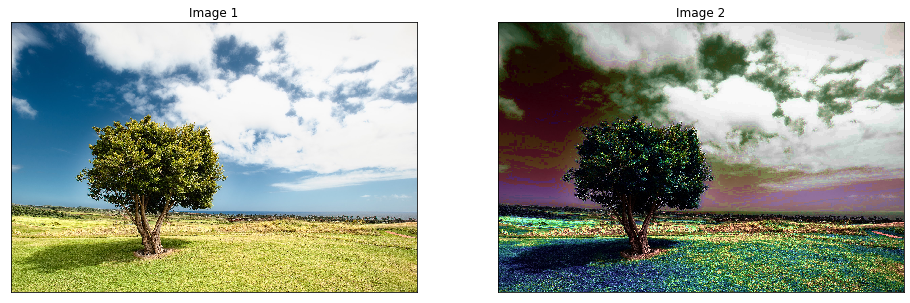

In [16]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(image_hsv)
hue, saturation, value = [cv2.equalizeHist(c) for c in (h, s, v)]
image_cv2 = cv2.cvtColor(cv2.merge((hue, saturation, value)), cv2.COLOR_HSV2RGB)
showTwoImages(image_color, image_cv2)

# * Enhance ảnh bằng cách cân bằng histogram kênh s và v

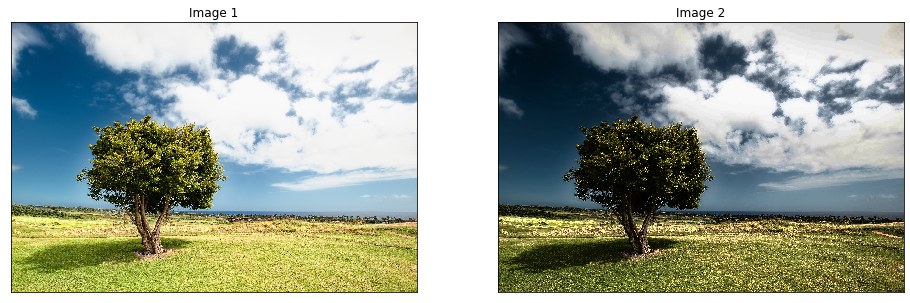

In [17]:
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
for channel in (1, 2):
    image_hsv[:, :, channel] = cv2.equalizeHist(image_hsv[:, :, channel])
image_enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
showTwoImages(image_color, image_enhanced)

# * Thực hiện các biến đổi gamma và hiển thị ảnh màu tương ứng

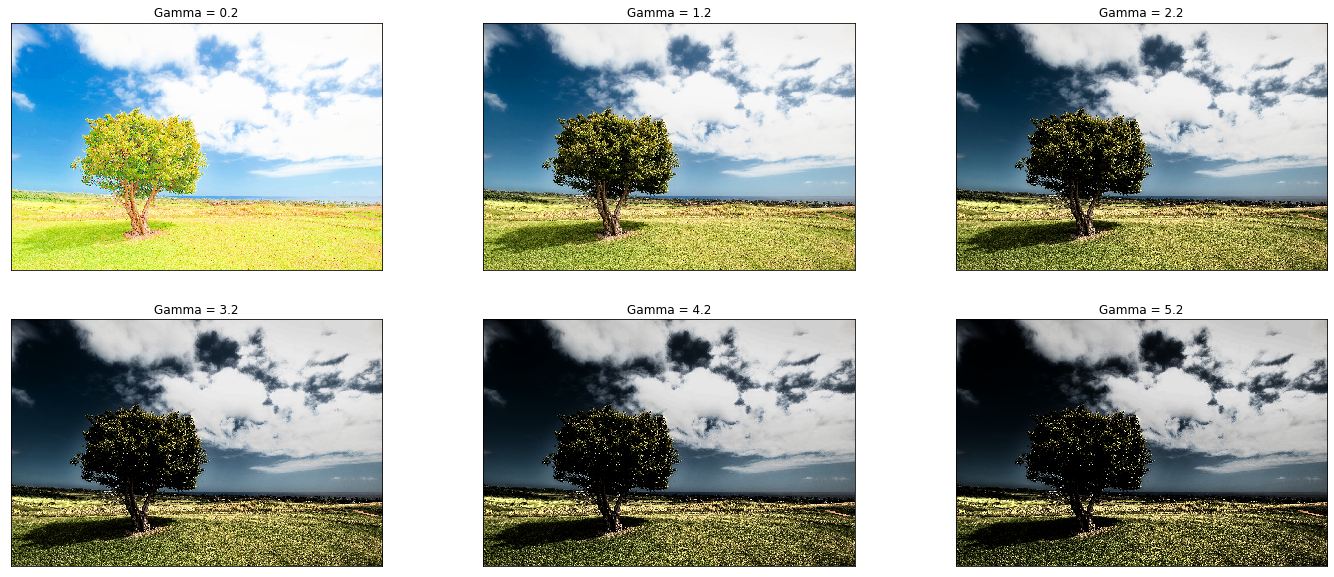

In [18]:
gamma_values = [0.2, 1.2, 2.2, 3.2, 4.2, 5.2]
gamma_transform = []
gamma_labels = []
for gamma_value in gamma_values:
    image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
    image_hsv[:, :, 2] = np.array(255 * (image_hsv[:,:,2]/255)**gamma_value, dtype = np.uint8)
    gamma_transform.append(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))
    gamma_labels.append(f'Gamma = {gamma_value}')
imShows(
    Images = gamma_transform, 
    Labels = gamma_labels, 
    rows = 2, 
    cols = 3
)

# * Chọn ngưỡng mức tối và ngưỡng mức sáng mà ở đó dưới mức tối sẽ cho tối hơn và trên mức sáng sẽ cho sáng hơn trên kênh màu value trong hsv. Sau đó hiển thị ảnh kết quả sau khi enhance

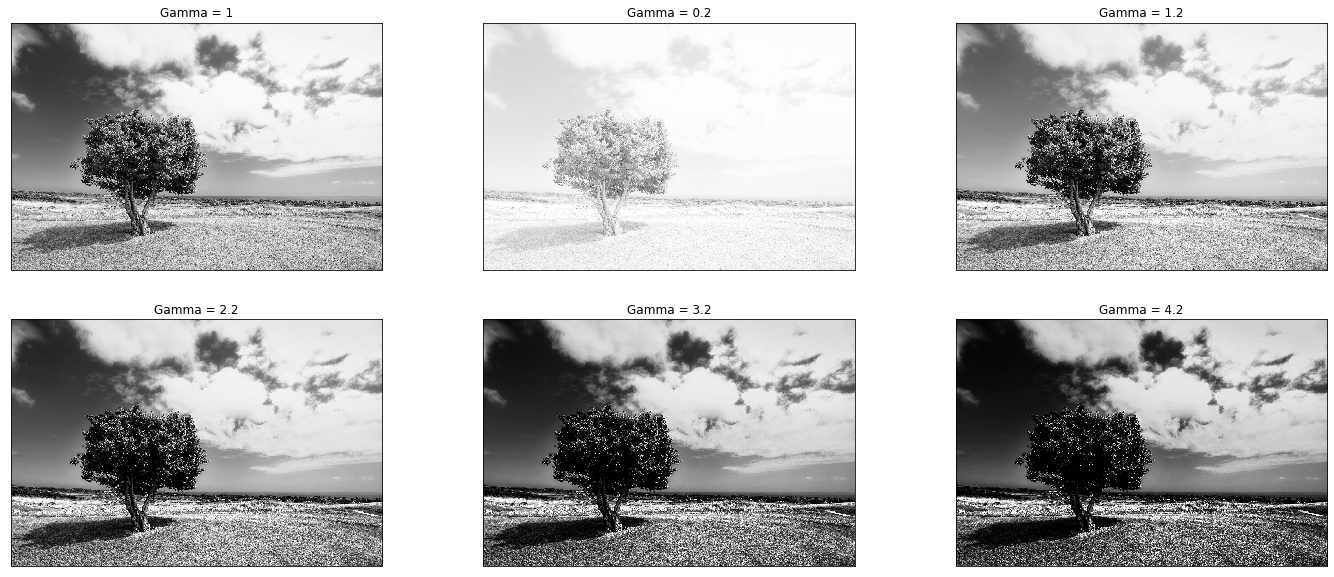

In [19]:
gammas = [0.2, 1.2, 2.2, 3.2, 4.2]
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_RGB2HSV)
img = image_hsv[:, :, 2]
gamma_transform = [image_gray]
gamma_labels = ['Gamma = 1']
for gamma in gammas:
    gamma_transform.append(np.array(255 * (img/255)**gamma, dtype = np.uint8))
    gamma_labels.append(f'Gamma = {gamma}')
imShows(
    Images = gamma_transform, 
    Labels = gamma_labels, 
    rows = 2, 
    cols = 3
)

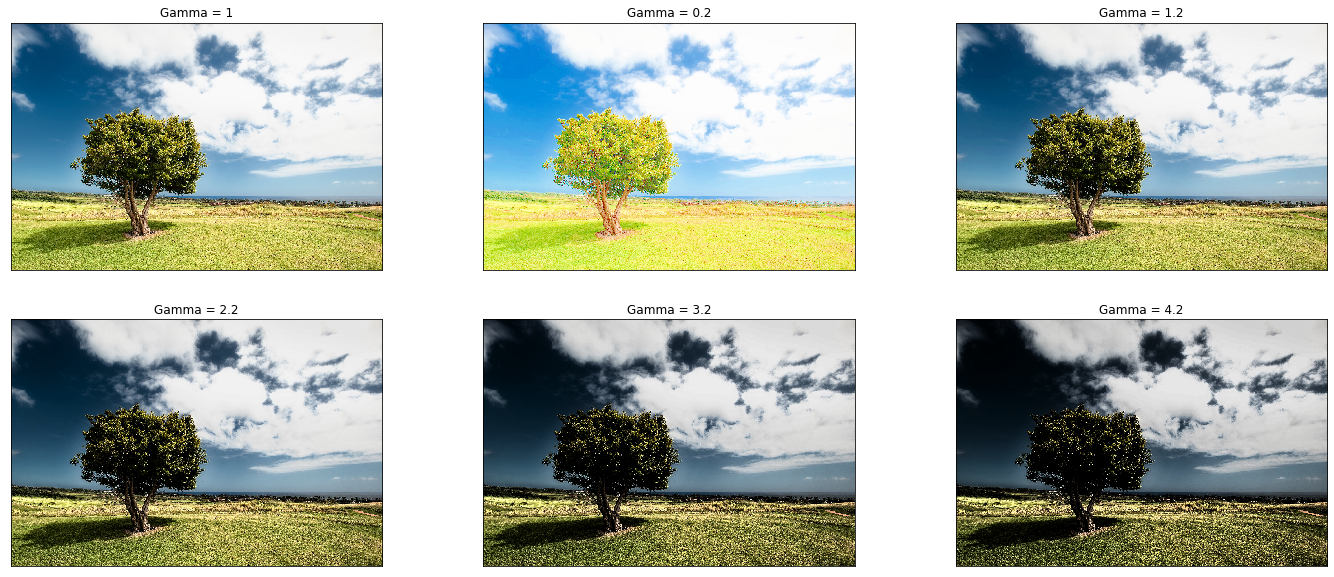

In [20]:
image_enhanced = [image_color,]
for i in range(1, 6):
    image_hsv_temp = image_hsv.copy()
    image_hsv_temp[:, :, 2] = gamma_transform[i]
    image_enhanced.append(cv2.cvtColor(image_hsv_temp, cv2.COLOR_HSV2RGB))
imShows(
    Images = image_enhanced,
    Labels = gamma_labels,
    rows = 2,
    cols = 3
)

# * Xuất ảnh biên/cạnh của ảnh gốc

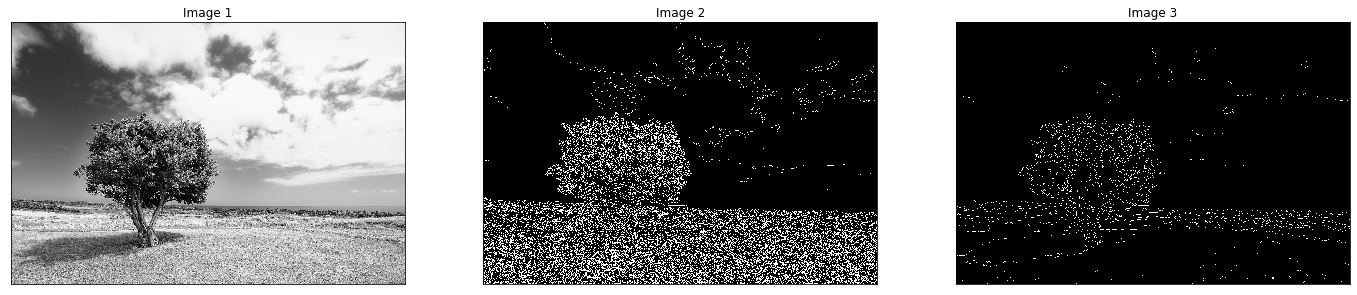

In [21]:
image_edges_01 = feature.canny(image_gray)
image_edges_02 = feature.canny(image_gray, sigma = 3)
showThreeImages(image_gray, image_edges_01, image_edges_02)